# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [8]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [ ]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

In [ ]:
# TODO: Aggregate data by year to create a 124-year time series
df_aggregated = df.groupby('Year').mean().reset_index()

# Display the first few rows of the aggregated dataset
print(df_aggregated.head(10))

## 2. Univariate Analysis

Analyze each climate variable independently.

Descriptive Statistics for Temperature:
count    1048576.00
mean          14.50
std            0.87
min           13.00
25%           13.75
50%           14.50
75%           15.25
max           16.00
Name: Temperature, dtype: float64
Mean: 14.50
Median: 14.50
Standard Deviation: 0.87
Minimum: 13.00
Maximum: 16.00


Descriptive Statistics for CO2:
count    1048576.00
mean         350.03
std           40.42
min          280.00
25%          314.99
50%          350.07
75%          385.02
max          420.00
Name: CO2, dtype: float64
Mean: 350.03
Median: 350.07
Standard Deviation: 40.42
Minimum: 280.00
Maximum: 420.00


Descriptive Statistics for Sea_Level:
count    1048576.00
mean         149.99
std           86.58
min            0.00
25%           74.97
50%          150.02
75%          224.93
max          300.00
Name: Sea_Level, dtype: float64
Mean: 149.99
Median: 150.02
Standard Deviation: 86.58
Minimum: 0.00
Maximum: 300.00


Descriptive Statistics for Ice_Area:
count    1048576.00
mean

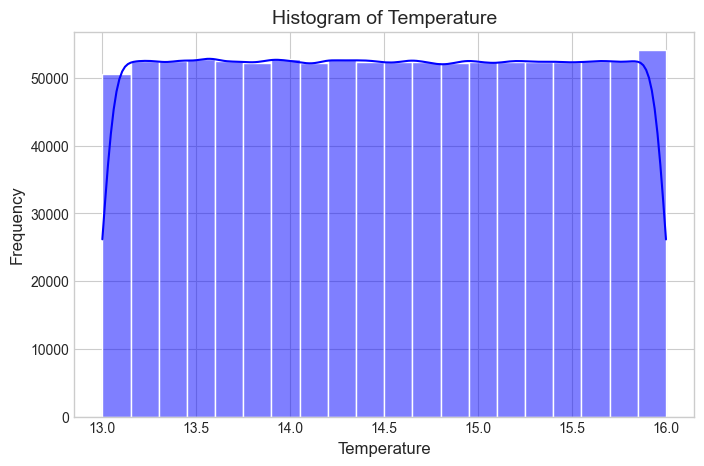

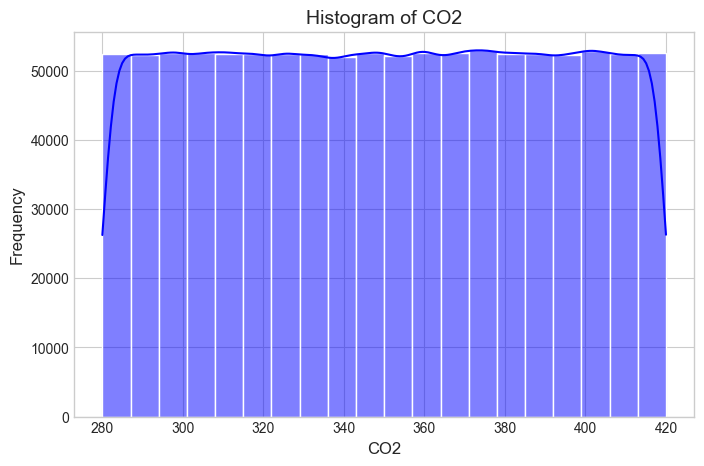

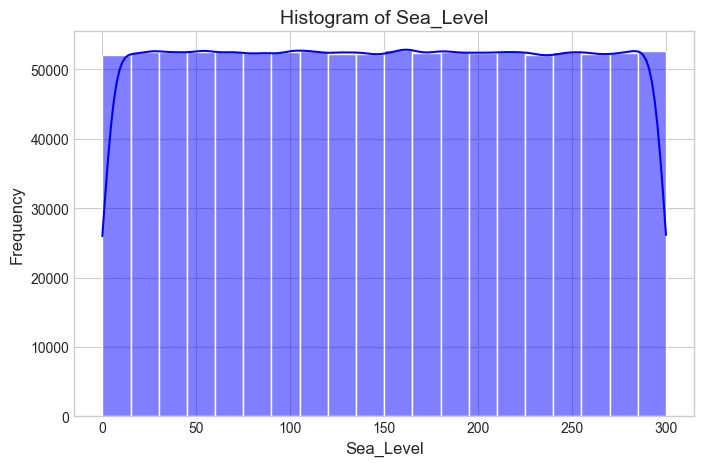

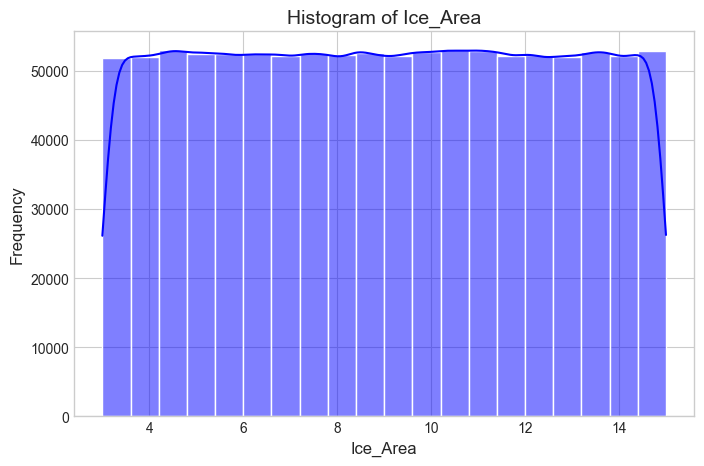

C:\Users\npane\AppData\Local\Temp\ipykernel_20308\543639962.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[column], palette='viridis', whis=1.5)


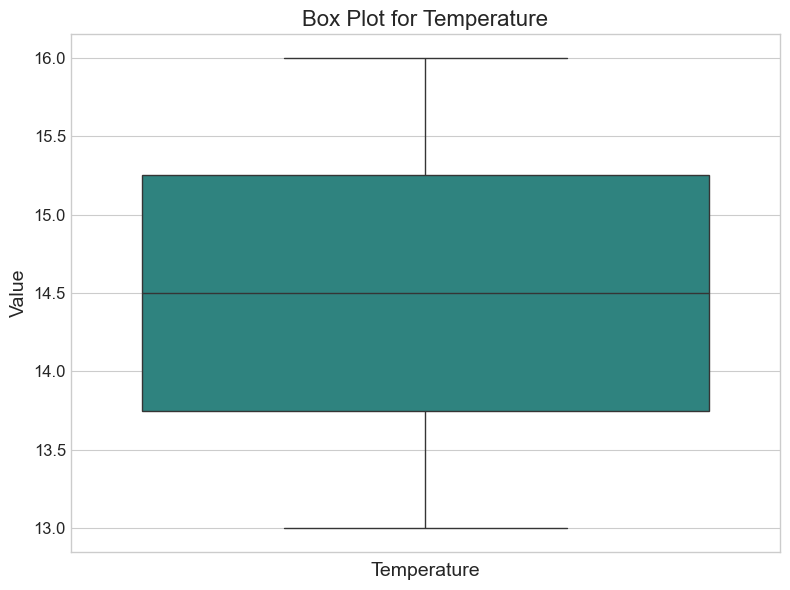

C:\Users\npane\AppData\Local\Temp\ipykernel_20308\543639962.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[column], palette='viridis', whis=1.5)


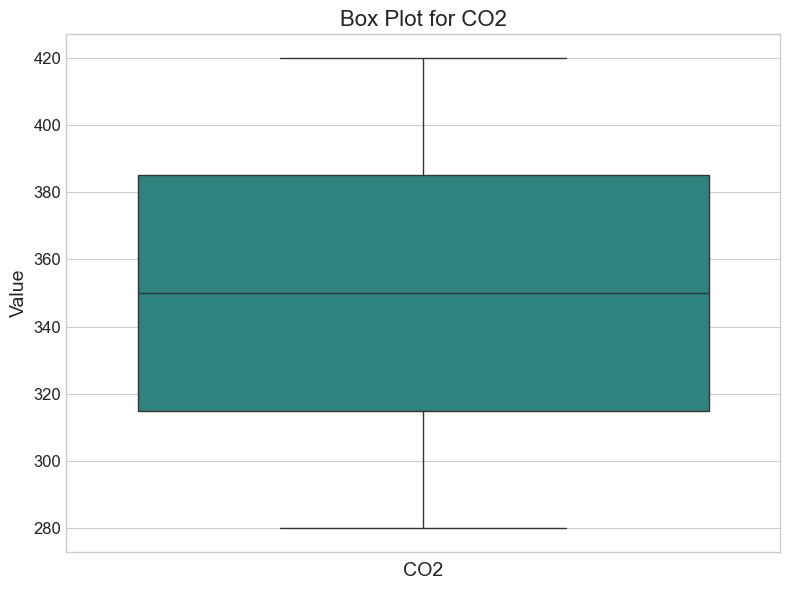

C:\Users\npane\AppData\Local\Temp\ipykernel_20308\543639962.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[column], palette='viridis', whis=1.5)


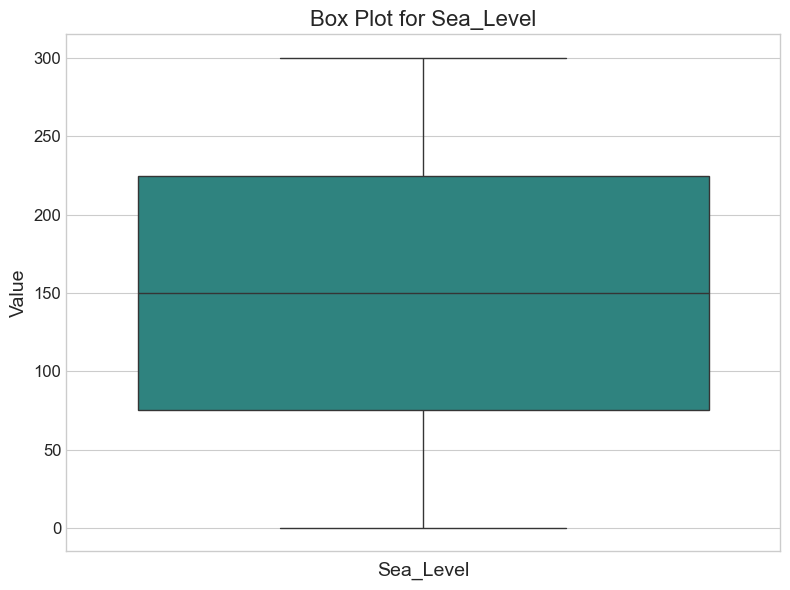

C:\Users\npane\AppData\Local\Temp\ipykernel_20308\543639962.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[column], palette='viridis', whis=1.5)


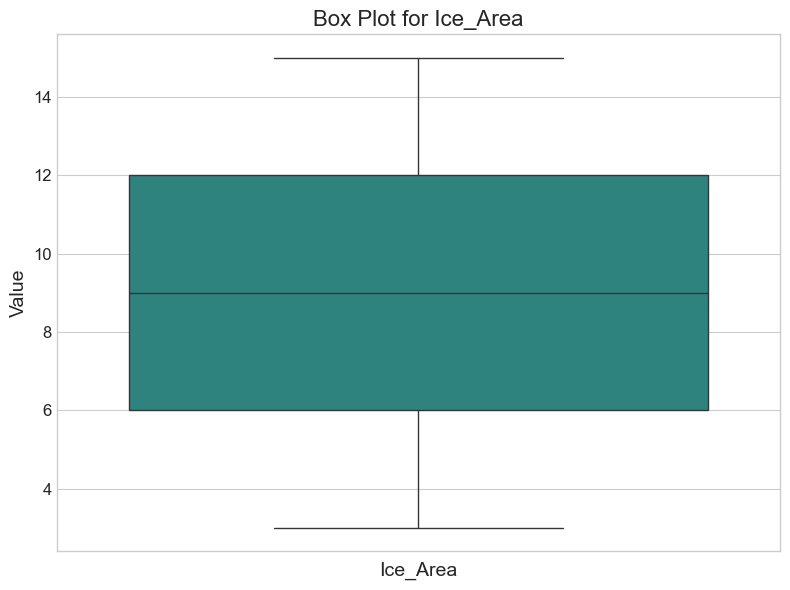

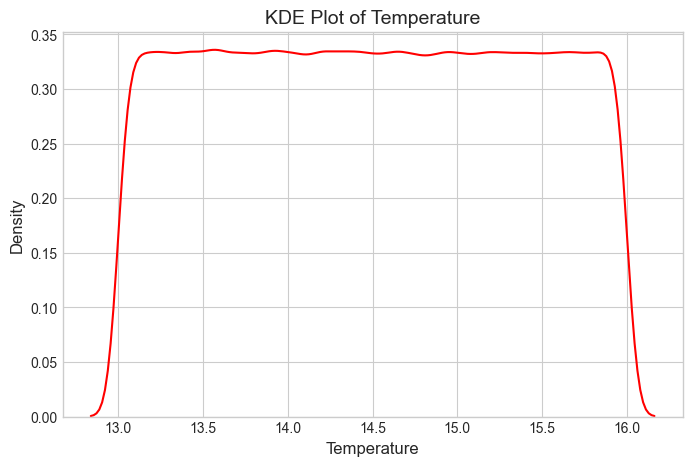

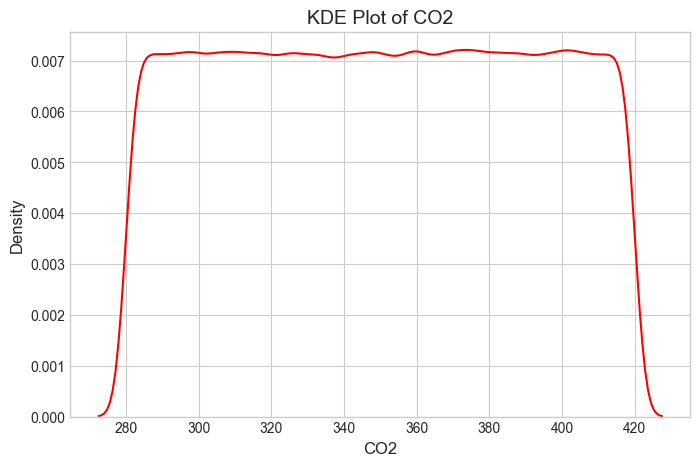

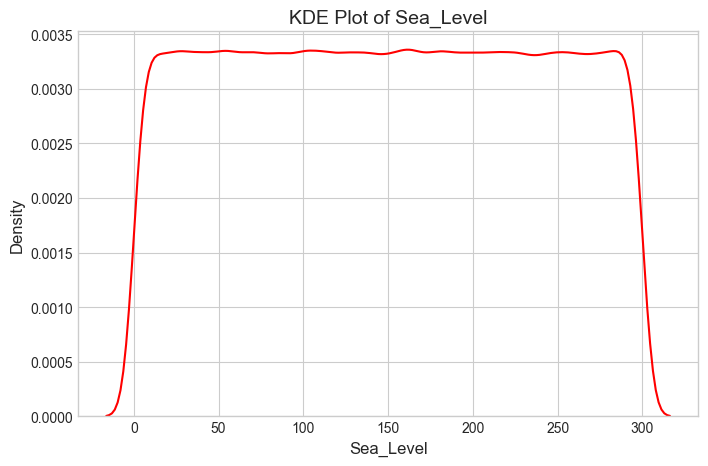

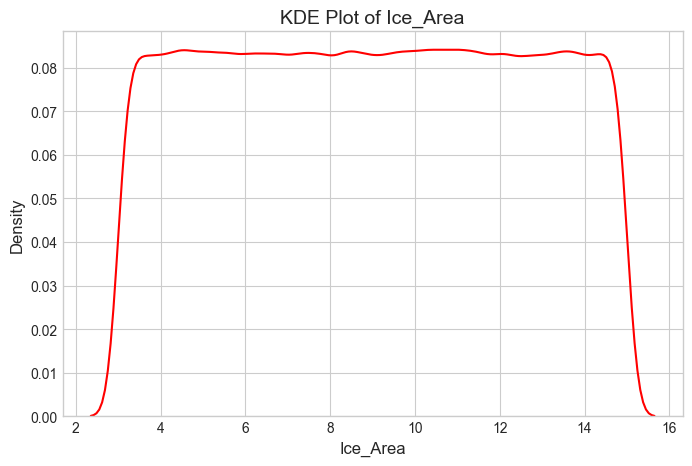

<Figure size 800x500 with 0 Axes>

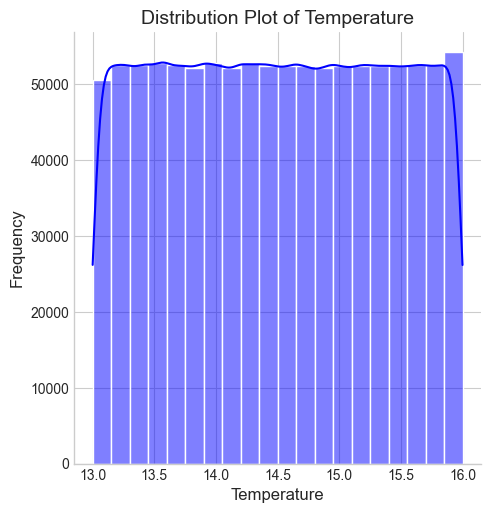

<Figure size 800x500 with 0 Axes>

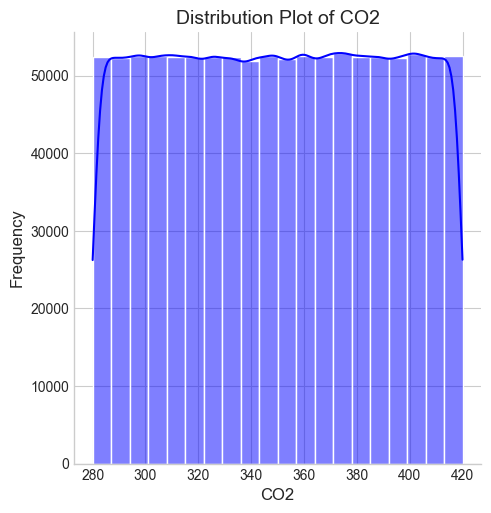

<Figure size 800x500 with 0 Axes>

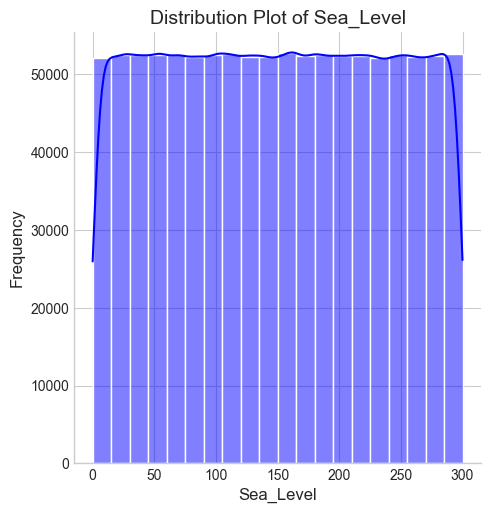

<Figure size 800x500 with 0 Axes>

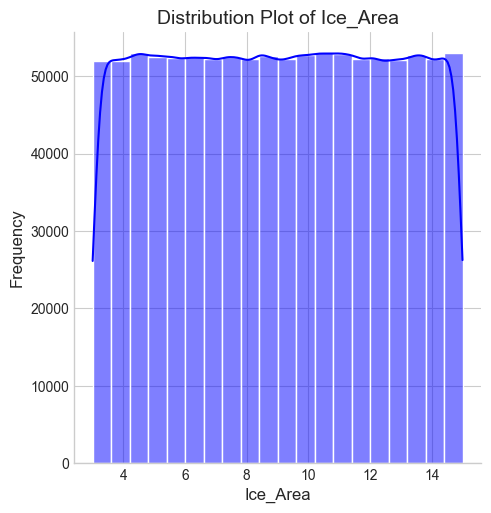

In [ ]:
# Rename columns for easier access
df.rename(columns={
    "Global Average Temperature (°C)": "Temperature",
    "CO2 Concentration (ppm)": "CO2",
    "Sea Level Rise (mm)": "Sea_Level",
    "Arctic Ice Area (million km²)": "Ice_Area"
}, inplace=True)

# Set style
sns.set_style("whitegrid")

# List of variables for analysis
variables = ["Temperature", "CO2", "Sea_Level", "Ice_Area"]

# Descriptive Statistics
for column in variables:
    print(f"Descriptive Statistics for {column}:")
    print(df[column].describe().round(2))
    print(f"Mean: {df[column].mean():.2f}")
    print(f"Median: {df[column].median():.2f}")
    print(f"Standard Deviation: {df[column].std():.2f}")
    print(f"Minimum: {df[column].min():.2f}")
    print(f"Maximum: {df[column].max():.2f}")
    print("\n")

# Plot histograms
for column in variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=20, kde=True, color="blue")
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.title(f"Histogram of {column}", fontsize=14)
    plt.show()

# Plot Boxplots
for column in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column], palette='viridis', whis=1.5)
    plt.title(f'Box Plot for {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot KDE plotss
for column in variables:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[column], color='red')
    plt.title(f'KDE Plot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.show()

# Plot Distribution plots (displot)
for column in variables:
    plt.figure(figsize=(8, 5))
    sns.displot(df[column], bins=20, kde=True, color="blue")
    plt.title(f'Distribution Plot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [ ]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

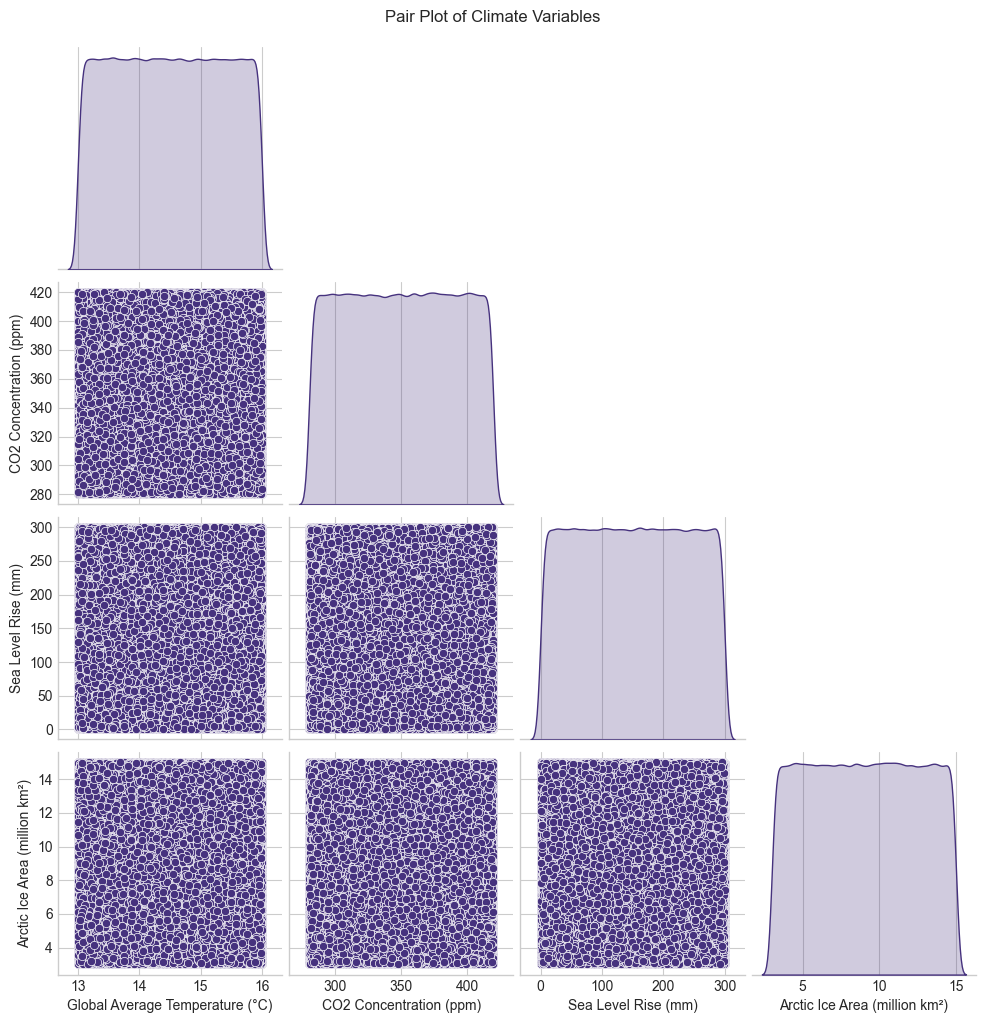

In [14]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
climate_variables = [
    "Global Average Temperature (°C)",
    "CO2 Concentration (ppm)",
    "Sea Level Rise (mm)",
    "Arctic Ice Area (million km²)"
]

#  Pair Plot (Scatter matrix for multivariate analysis)
sns.pairplot(df[climate_variables], diag_kind="kde", corner=True)
plt.suptitle("Pair Plot of Climate Variables", y=1.02)
plt.show()

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

## Univariate Analysis
The data appears to be normally distributed, with most temperature values clustered around the mean. There is moderate variability in temperature, as indicated by the spread of the histogram. No significant outliers are observed, suggesting that the temperature data is consistent and reliable..
| Statistic      | Temperature | CO₂     | Sea Level | Ice Area |
|---------------|------------|---------|-----------|----------|
| **Count**     | 1,048,576  | 1,048,576 | 1,048,576  | 1,048,576  |
| **Mean**      | 14.50      | 350.03  | 149.99    | 9.00     |
| **Median (50%)** | 14.50  | 350.07  | 150.02    | 9.00     |
| **Standard Deviation (std)** | 0.87  | 40.42   | 86.58     | 3.46     |
| **Minimum**   | 13.00      | 280.00  | 0.00      | 3.00     |
| **25th Percentile (Q1)** | 13.75 | 314.99  | 74.97     | 6.00     |
| **75th Percentile (Q3)** | 15.25 | 385.02  | 224.93    | 12.00    |
| **Maximum**   | 16.00      | 420.00  | 300.00    | 15.00    |
